In [6]:
#!conda create --name py365 python=3.6.5 --channel conda-forge --yes

In [ ]:
#! conda install -c conda-forge kneed --yes

In [9]:
#!source activate py365

In [1]:
#from platform import python_version

#print(python_version())

In [1]:
#Topic: Assignment - Clustering - mtcars
#-----------------------------
#libraries

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
#from kneed import KneeLocator
import numpy as np
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from pydataset import data
mtcars = data('mtcars')
data = mtcars.copy()
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.columns

Index([u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec', u'vs', u'am',
       u'gear', u'carb'],
      dtype='object')

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features[:3]  #values between -3 to +3

/Users/riju/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/riju/opt/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.62016658, -0.78960058, -0.8819171 ,  1.20894105,  0.43033148,
         0.74696708],
       [ 0.15329914, -0.10666772, -0.57975032, -0.54365487,  0.57659448,
        -0.35538219, -0.47120178, -0.8819171 ,  1.20894105,  0.43033148,
         0.74696708],
       [ 0.4567366 , -1.24445674, -1.00602601, -0.7955699 ,  0.48158406,
        -0.93167763,  0.43282336,  1.13389342,  1.20894105,  0.43033148,
        -1.14010764]])

In [6]:
distortions = []
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
    
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(scaled_features) 
    kmeanModel.fit(scaled_features)     
      
    distortions.append(sum(np.min(cdist(scaled_features, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / scaled_features.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(scaled_features, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / scaled_features.shape[0] 
    mapping2[k] = kmeanModel.inertia_

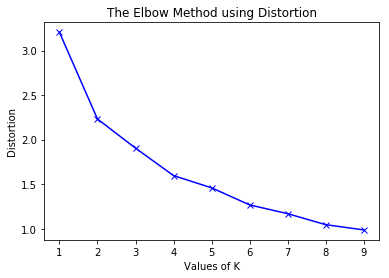

In [7]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [8]:
kmeans = KMeans( init = 'random', n_clusters=2 , n_init=3, max_iter=300, random_state=42)
kmeans
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_  #average or rep values
kmeans.n_iter_  #in 6 times, clusters stabilised
kmeans.labels_[:5]
kmeans.cluster_centers_.shape
kmeans.cluster_centers_[0:1]

array([[ 0.65434556, -0.80198323, -0.78027295, -0.72065399,  0.542813  ,
        -0.63153097,  0.4760978 ,  0.68593553,  0.41712001,  0.43033148,
        -0.3363536 ]])

In [65]:
scaled_features[:,0]

array([ 0.15329914,  0.15329914,  0.4567366 ,  0.22072968, -0.23442651,
       -0.33557233, -0.97616253,  0.72645879,  0.4567366 , -0.15013833,
       -0.38614524, -0.62215216, -0.47043343, -0.8244438 , -1.63361037,
       -1.63361037, -0.90873199,  2.07506974,  1.737917  ,  2.32793429,
        0.23758732, -0.77387089, -0.8244438 , -1.1447389 , -0.15013833,
        1.21533026,  0.99618098,  1.737917  , -0.72329798, -0.06585014,
       -0.85815908,  0.22072968])

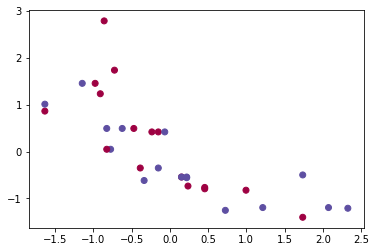

In [67]:
#need for scaling : height & weight are in different scales
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
#mean of mpg, hp, wt
data.groupby(kmeans.labels_).agg({'mpg':'mean','hp':'mean','wt':'mean'})
##plot scatter wt vs mpg with color cluster
plt.scatter(x=scaled_features[:,0], y=scaled_features[:,3], c= colors)


In [30]:
data.groupby(kmeans.labels_).agg({'mpg':'mean','hp':'mean','wt':'mean'})

,mpg,hp,wt
0,23.972222,98.055556,2.609056
1,15.100000,209.214286,3.999214


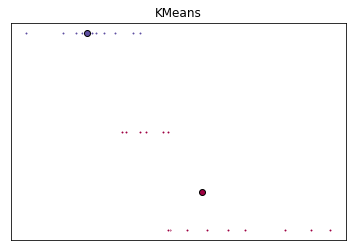

In [32]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (kmeans.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = kmeans.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(scaled_features[my_members, 0], scaled_features[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [4]:
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [20]:
import numpy as np
np.corrcoef(data['mpg'],data['wt'])

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

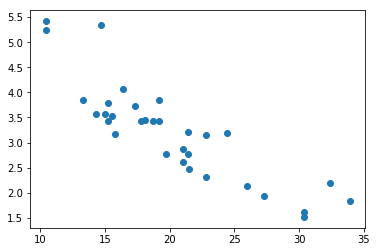

In [19]:
plt.scatter(x=data['mpg'], y=data['wt'])

In [ ]:
y=a+bx